# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [7]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.metrics import confusion_matrix DEPRECATED
# em seu lugar foi utilizado from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
# Carreguando a base de dados 'demo01.csv' e avalie-a
df = pd.read_csv('demo01.csv')
# visualizando informações sobre as variáveis, tipos de dados e quantidade de valores nulos
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [4]:
# Verificando a quantidade de valores nulos em cada coluna
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [9]:
# Removendo variáveis categóricas não necessárias para a árvore de decisão
X = df.drop(['mau', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], axis=1)
y = df['mau']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
# Definindo o modelo de árvore de decisão com profundidade limitada
modelo = DecisionTreeClassifier(random_state=100, max_depth=3)

In [11]:
# Treinando o modelo
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

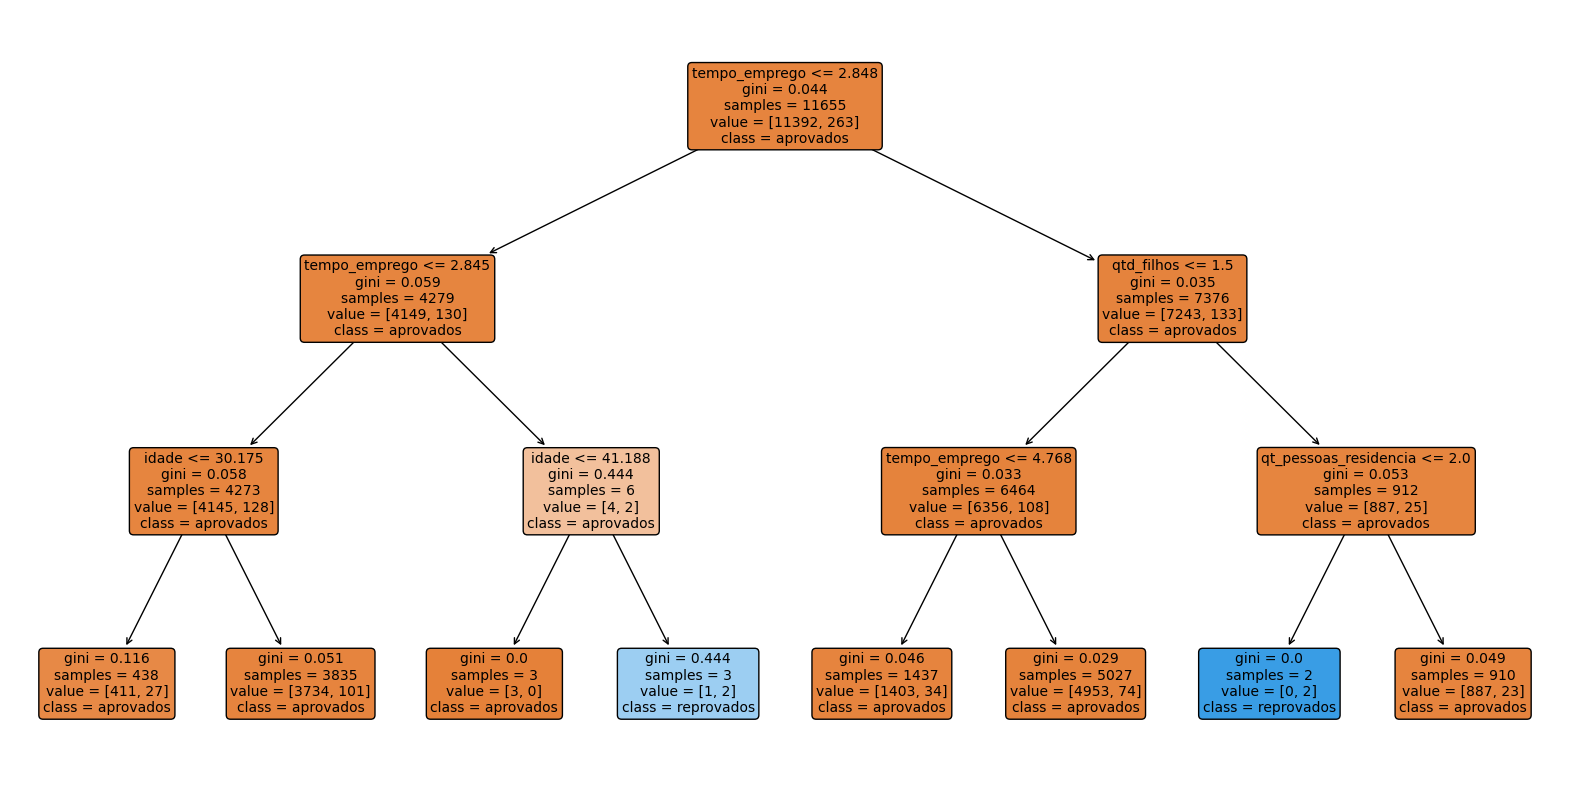

In [12]:
# Visualizando a árvore de decisão com profundidade limitada
plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, feature_names=X.columns.tolist(), class_names=['aprovados', 'reprovados'], rounded=True, fontsize=10)
plt.show()

Valores únicos em y_train: [False  True]
Todas as classes necessárias estão presentes em y_train.


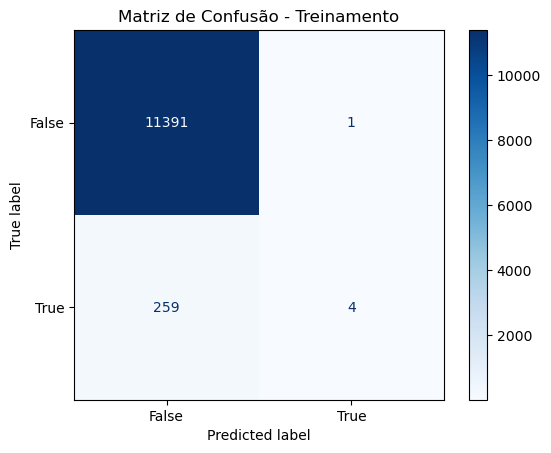

In [13]:
# Verificando os valores únicos em y_train
unique_labels = np.unique(y_train)
print("Valores únicos em y_train:", unique_labels)

# Me certificando de que 'aprovados' e 'reprovados' estejam presentes nos rótulos
required_labels = [False, True]  # As classes reais presentes em y_train
missing_labels = [label for label in required_labels if label not in unique_labels]

if missing_labels:
    print(f"As seguintes classes estão ausentes em y_train: {missing_labels}")
else:
    print("Todas as classes necessárias estão presentes em y_train.")

# Predição na base de treinamento
y_pred_train = modelo.predict(X_train)

# Matriz de confusão
cm_train = confusion_matrix(y_train, y_pred_train, labels=[False, True])

# Visualização da matriz de confusão
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[False, True])
disp_train.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Treinamento')
plt.show()

In [14]:
# Predição na base de treinamento
y_pred_train = modelo.predict(X_train)

# Calcular a acurácia
accuracy_train = accuracy_score(y_train, y_pred_train)

# Imprimir a acurácia na base de treinamento
print(f'Acurácia na base de treinamento: {accuracy_train:.2%}')

Acurácia na base de treinamento: 97.77%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [15]:
# Classifique a base de teste de acordo com a árvore treinada no item 2.
predicao_teste = modelo.predict(X_test)

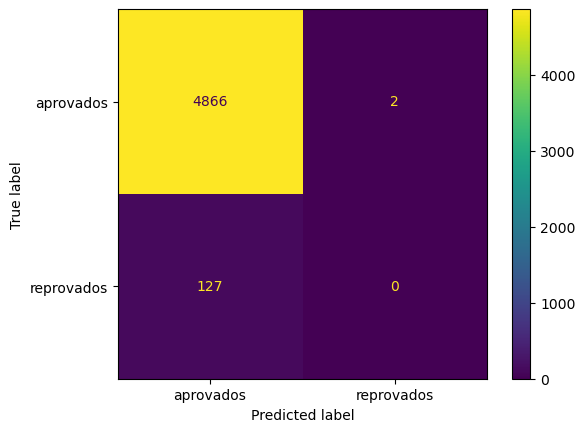

In [16]:
# Criando uma visualização gráfica da matriz de confusão para a base de teste
# Utilizando a função ConfusionMatrixDisplay.from_predictions
# Argumentos:
#   y_test: Rótulos verdadeiros da base de teste
#   predicao_teste: Previsões do modelo na base de teste
#   display_labels: Rótulos das classes para melhor interpretação visual ('aprovados' e 'reprovados')
ConfusionMatrixDisplay.from_predictions(y_test, predicao_teste, display_labels=['aprovados', 'reprovados'])

In [17]:
# Calculando a acurácia do modelo na base de teste
# Utilizando a função accuracy_score
# Argumentos:
#   y_test: Rótulos verdadeiros da base de teste
#   predicao_teste: Previsões do modelo na base de teste
accuracy_score(y_test, predicao_teste)

0.9741741741741742

In [18]:
# Criando um novo modelo de árvore de decisão com parâmetros específicos
# random_state=100 garante reprodutibilidade
# max_depth=5 define a profundidade máxima da árvore
# min_samples_leaf=10 define o número mínimo de observações por folha
modelo = DecisionTreeClassifier(random_state=100, max_depth=5, min_samples_leaf=10)

# Treinando o novo modelo com os dados de treinamento
modelo = modelo.fit(X_train, y_train)

In [19]:
# Realizando previsões na base de teste usando o novo modelo
predicao = modelo.predict(X_test)

# Calculando a acurácia comparando as previsões com os rótulos reais da base de teste
accuracy_score(y_test, predicao)

0.973973973973974

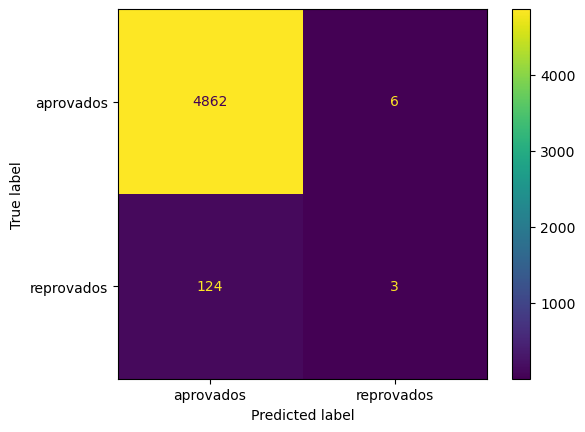

In [20]:
# Criando e exibindo uma matriz de confusão a partir das previsões e dos rótulos reais da base de teste
ConfusionMatrixDisplay.from_predictions(y_test, predicao, display_labels=['aprovados', 'reprovados'])

In [21]:
# Calculando a proporção de observações classificadas como 'mau' em relação ao total
proporcao_maus = (698 + 407) / (698 + 407 + 2938 + 952) * 100

In [22]:
# Criando uma predição fictícia em que todos os contratos são classificados como 'bons'
predicao_bons = np.ones(len(predicao))
predicao_bons

array([1., 1., 1., ..., 1., 1., 1.])

In [23]:
# Calculando a acurácia se todos os contratos fossem classificados como 'bons'
accuracy_score(y_test, predicao_bons)

0.025425425425425426